In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import train


In [ ]:
dfList = train.transform()
#df.shape

In [ ]:
df1List = dfList
dfList = df1List
for df in dfList:
    scaler = MinMaxScaler(feature_range=(0,1)).fit(df)
    df = scaler.transform(df)
#print(dfList[12])
#df.head(5)

In [ ]:
def eval(accList, precisionList, tprList, farList, frrList):
    avgaccuracy = 0
    avgPrecision = 0
    avgTpr = 0
    avgFar = 0
    avgFrr = 0
    for i in range(len(accList)):
        avgaccuracy += accList[i]
        avgPrecision += precisionList[i]
        avgTpr += tprList[i]
        avgFar += farList[i]
        avgFrr += frrList[i]
    avgaccuracy = avgaccuracy / len(accList)
    avgPrecision = avgPrecision / len(precisionList)
    avgTpr = avgTpr / len(tprList)
    avgFar = avgFar / len(farList)
    avgFrr = avgFrr / len(frrList)

    print("average acc = "+str(avgaccuracy))
    print("average precision = "+str(avgPrecision))
    print("average TPR = "+str(avgTpr))
    print("average FAR = "+str(avgFar))
    print("average FRR = "+str(avgFrr))

In [ ]:
import pickle
#i=0
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set

    #print(pd.Series(y_train).value_counts())
    #print(pd.Series(y_test).value_counts())

    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    #print(pd.Series(y_re).value_counts())
    
    model = svm.SVC(kernel='rbf', C=10)

    model.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
    y_pred = model.predict(X_test)

    #print(f"model{i} train score: " + str(model.score(X_re, y_re)))
    #print(f"model{i} test score: " + str(model.score(X_test, y_test.astype('int'))))
    
    #pickle.dump(model,open(f'./models/model{i}.pkl','wb'))
    acc = cross_val_score(model, X_train, y_train.astype('int'), cv=5, scoring='accuracy')
    #print(acc)
    #print(acc.mean()*100, '%')
    #i+=1
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
eval(accList, precisionList, tprList, farList, frrList)


In [ ]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int'))
    
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_re,y_re)
    
    y_pred = knn.predict(X_test)
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList)

In [ ]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int'))
    
    MLP = MLPClassifier(hidden_layer_sizes=(100,10))
    MLP.fit(X_re,y_re)
    
    y_pred = MLP.predict(X_test)
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList)

In [ ]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int'))
    
    DT = DecisionTreeClassifier(criterion='entropy')
    DT.fit(X_re,y_re)
    
    y_pred = DT.predict(X_test)
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList)

In [ ]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int'))
    
    RF = RandomForestClassifier(n_estimators=22)
    RF.fit(X_re,y_re)
    
    y_pred = RF.predict(X_test)
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList)

In [ ]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int'))
    
    GNB = GaussianNB()
    GNB.fit(X_re,y_re)
    
    y_pred = GNB.predict(X_test)
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList)

In [ ]:
from sklearn.ensemble import VotingClassifier

precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int'))
    
    clf1 = svm.SVC(kernel='rbf', C=10)
    clf2 = MLPClassifier(hidden_layer_sizes=(100,10))
    voting_clf1 = VotingClassifier(estimators=[('svm', clf1), ('mlp', clf2)], voting='hard')
    
    voting_clf1.fit(X_re,y_re)
    
    y_pred = voting_clf1.predict(X_test)
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList)

In [ ]:
from sklearn.ensemble import VotingClassifier

precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int'))
    
    clf1 = svm.SVC(kernel='poly', C=10)
    clf2 = svm.SVC(kernel='rbf', C=10)
    voting_clf2 = VotingClassifier(estimators=[('svm1', clf1), ('svm2', clf2)], voting='hard')
    
    voting_clf2.fit(X_re,y_re)
    
    y_pred = voting_clf2.predict(X_test)
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList)

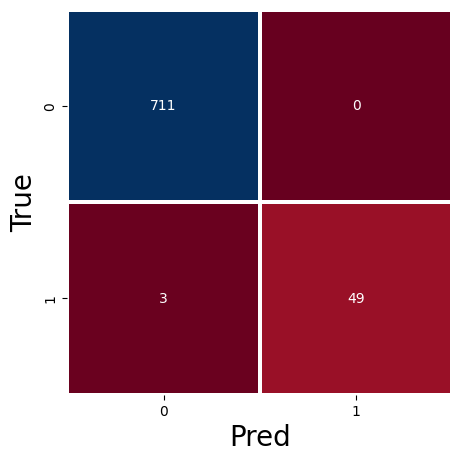

acc = 0.9960681520314548
precision = 1.0
TPR = 0.9423076923076923
FAR = 0.0
FRR = 0.057692307692307696


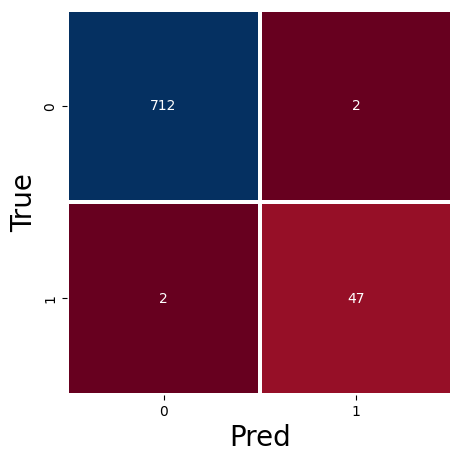

acc = 0.9947575360419397
precision = 0.9591836734693877
TPR = 0.9591836734693877
FAR = 0.0028011204481792717
FRR = 0.04081632653061224


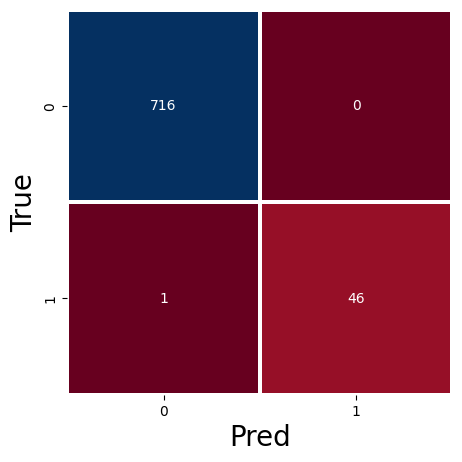

acc = 0.9986893840104849
precision = 1.0
TPR = 0.9787234042553191
FAR = 0.0
FRR = 0.02127659574468085


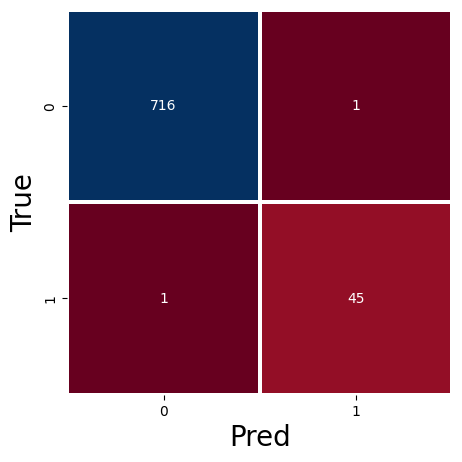

acc = 0.9973787680209698
precision = 0.9782608695652174
TPR = 0.9782608695652174
FAR = 0.001394700139470014
FRR = 0.021739130434782608


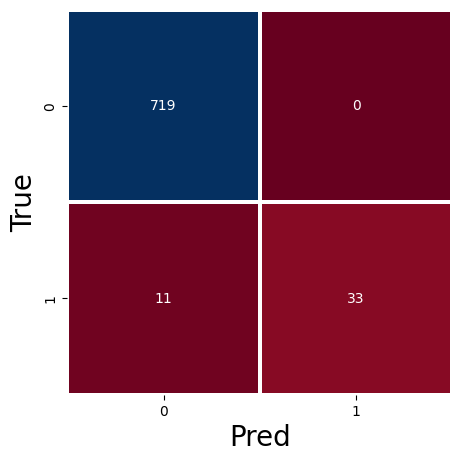

acc = 0.9855832241153342
precision = 1.0
TPR = 0.75
FAR = 0.0
FRR = 0.25


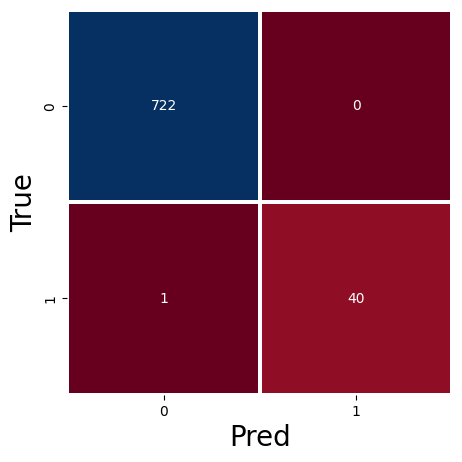

acc = 0.9986893840104849
precision = 1.0
TPR = 0.975609756097561
FAR = 0.0
FRR = 0.024390243902439025


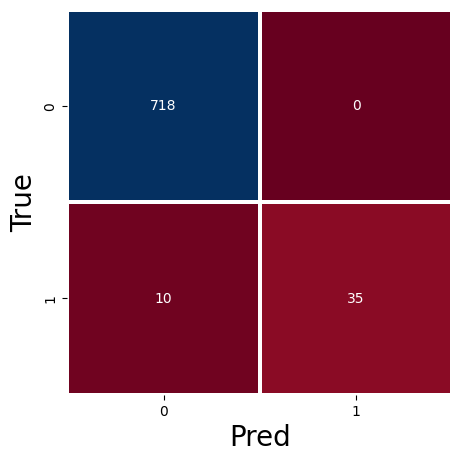

acc = 0.9868938401048493
precision = 1.0
TPR = 0.7777777777777778
FAR = 0.0
FRR = 0.2222222222222222


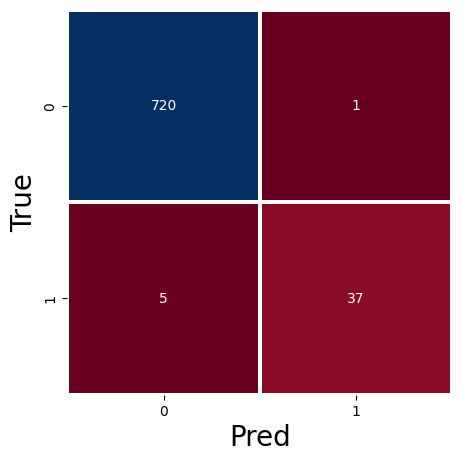

acc = 0.9921363040629095
precision = 0.9736842105263158
TPR = 0.8809523809523809
FAR = 0.0013869625520110957
FRR = 0.11904761904761904


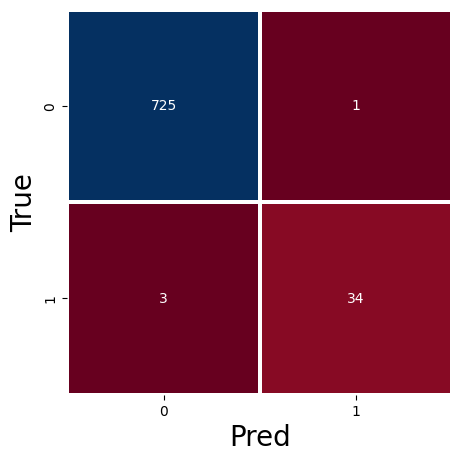

acc = 0.9947575360419397
precision = 0.9714285714285714
TPR = 0.918918918918919
FAR = 0.0013774104683195593
FRR = 0.08108108108108109


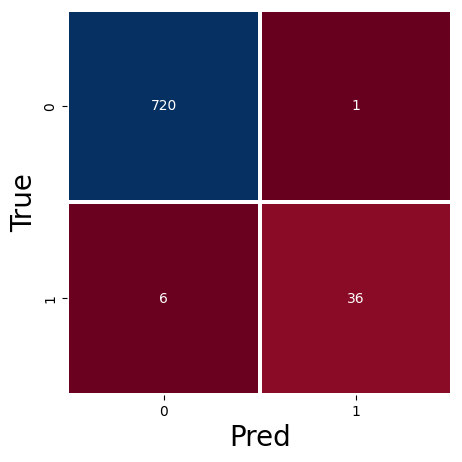

acc = 0.9908256880733946
precision = 0.972972972972973
TPR = 0.8571428571428571
FAR = 0.0013869625520110957
FRR = 0.14285714285714285


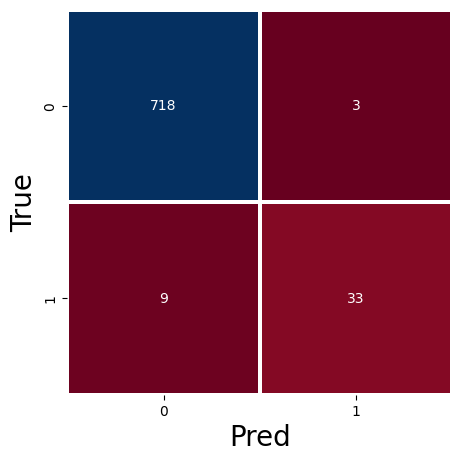

acc = 0.9842726081258192
precision = 0.9166666666666666
TPR = 0.7857142857142857
FAR = 0.004160887656033287
FRR = 0.21428571428571427


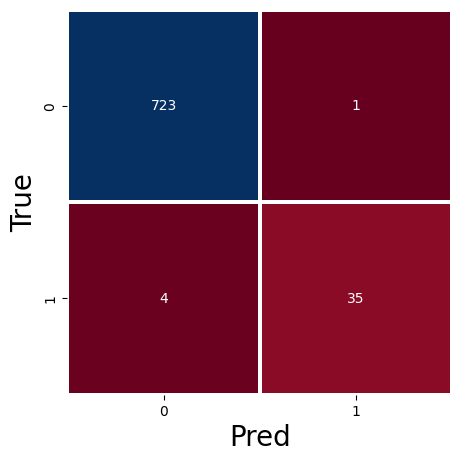

acc = 0.9934469200524246
precision = 0.9722222222222222
TPR = 0.8974358974358975
FAR = 0.0013812154696132596
FRR = 0.10256410256410256


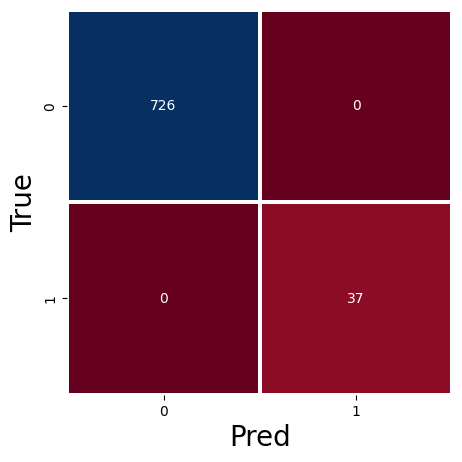

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


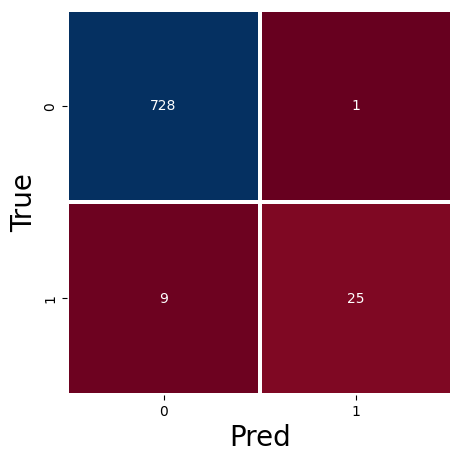

acc = 0.9868938401048493
precision = 0.9615384615384616
TPR = 0.7352941176470589
FAR = 0.0013717421124828531
FRR = 0.2647058823529412


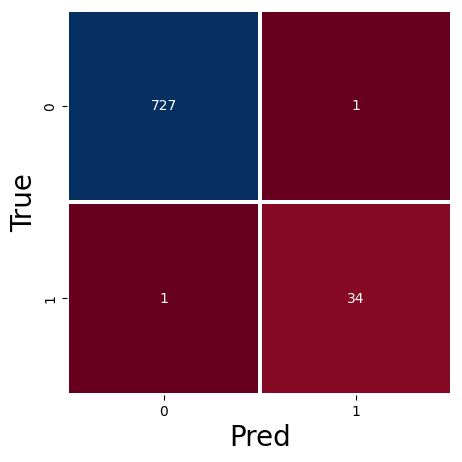

acc = 0.9973787680209698
precision = 0.9714285714285714
TPR = 0.9714285714285714
FAR = 0.0013736263736263737
FRR = 0.02857142857142857


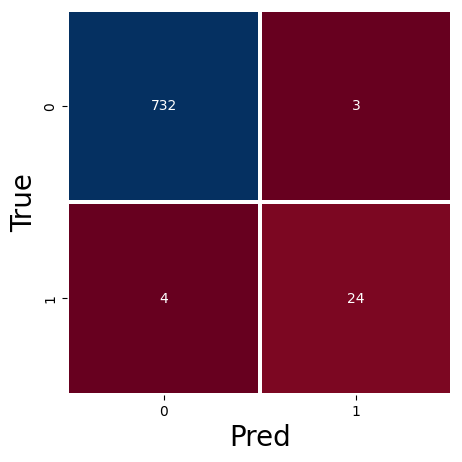

acc = 0.9908256880733946
precision = 0.8888888888888888
TPR = 0.8571428571428571
FAR = 0.004081632653061225
FRR = 0.14285714285714285


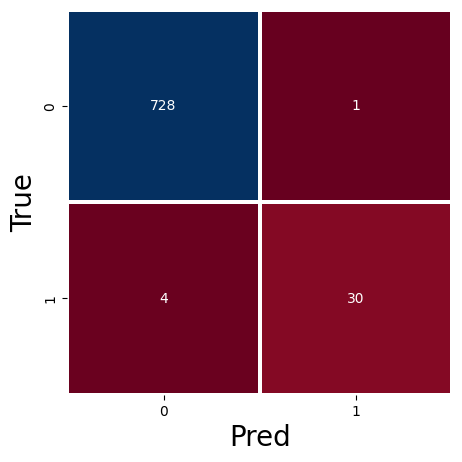

acc = 0.9934469200524246
precision = 0.967741935483871
TPR = 0.8823529411764706
FAR = 0.0013717421124828531
FRR = 0.11764705882352941


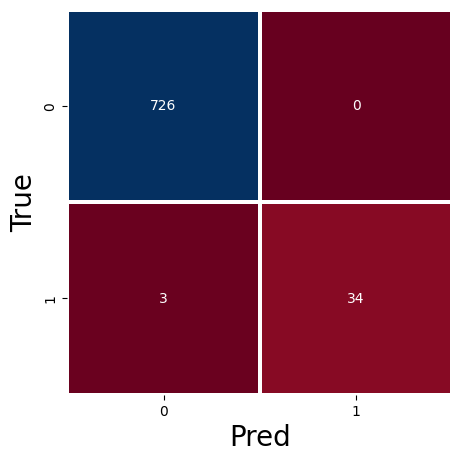

acc = 0.9960681520314548
precision = 1.0
TPR = 0.918918918918919
FAR = 0.0
FRR = 0.08108108108108109


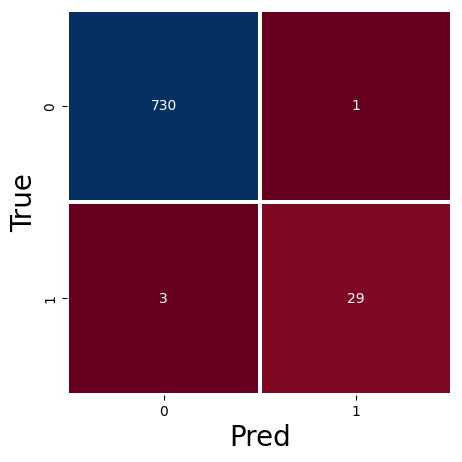

acc = 0.9947575360419397
precision = 0.9666666666666667
TPR = 0.90625
FAR = 0.0013679890560875513
FRR = 0.09375
average acc = 0.9933089604745811
average precision = 0.9737201953083058
average TPR = 0.8933376273658513
average FAR = 0.0012345258733357071
average FRR = 0.10666237263414881


In [6]:
from sklearn.ensemble import VotingClassifier

precisionList = []
accList = []
tprList = []
farList = []
frrList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int'))
    
    clf1 = DecisionTreeClassifier(criterion='entropy')
    clf2 = RandomForestClassifier(n_estimators=22)
    voting_clf3 = VotingClassifier(estimators=[('dt', clf1), ('rf', clf2)], voting='hard')
    
    voting_clf3.fit(X_re,y_re)
    
    y_pred = voting_clf3.predict(X_test)
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList)

In [ ]:
print(classification_report(y_test.astype('int'),y_pred))

In [ ]:
import pickle 
pickle.dump(model,open('model.pkl','wb'))